Double Well Wavefunction Calculation

So I want to implement a simple variational principle calculation to get a better approximation of the wavefunction of a particle in a double well as the wells come together.
- Write potential down
    - Use two gaussians
- Simple Variation parameters:
    - Spacing of wells
    - width of wavefunction
- More complicated parameters
    - mixing with excited states

### Warmup: variational principle in a single gaussian

In [11]:
from scipy.interpolate import interp1d

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('dark_background')
import scipy.optimize as opt

In [13]:
from fitters.Gaussian import dip, bump

$$
\xi =\sqrt{\frac{m\omega}{\hbar}} x\\
\psi_n \{x\}=\Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\{\xi\} e^{-\xi^2/2}\\
= \Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\big\{\sqrt{\frac{m\omega}{\hbar}x}\big\} e^{-\frac{m\omega}{2\hbar}x^2}
$$

$$
\psi_0\{x\}=\Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \exp\big\{-\frac{m\omega}{2\hbar}x^2\big\}
$$

In [14]:
import MarksConstants as mc

In [15]:
2*np.sqrt(mc.hbar / (mc.Rb87_M*(2*np.pi*150e3)))*1e9

55.689733561240146

In [16]:
2*mc.hbar / (mc.Rb87_M*(2*np.pi*150e3))*1e9

1.5506732120609587e-06

In [17]:
def psiBump(x, x0, nu):
    omega = 2*np.pi*nu
    sig = np.sqrt(mc.hbar / (mc.Rb87_M*omega))
    return (1/(np.pi*sig**2))**(1/4) * np.exp(-(x-x0)**2/(2*sig**2))

$$
\omega_r = \sqrt{\frac{4V}{m_{Rb}w_0^2}}
$$

In [18]:
def potentialDipW0(x,V,x0,w0):
    return dip.f(x, -V, x0, w0/2, 0)

In [19]:
def potentialDip(x,V,x0,nu):
    # nu is the trap frequency an atom should see in the trap.
    w0 = np.sqrt(4*V/(mc.Rb87_M*((2*np.pi)*nu)**2))
    return dip.f(x, -V, x0, w0/2, 0)

In [20]:
def KE(xpts, psipts):
    d1Term = np.diff(psipts)/np.diff(xpts)
    d1Term = np.append(d1Term,0)
    d2Term = np.diff(d1Term)/np.diff(xpts)
    d2Term = np.append(d2Term,0)
    return -mc.hbar**2/(2*mc.Rb87_M) * d2Term

In [21]:
def calculateEnergy(xpts, psi, potential):
    return integ.simps(psi*potential*psi,xpts) + integ.simps(psi*KE(xpts,psi),xpts)

In [22]:
import scipy.integrate as integ

In [23]:
res = np.diff(np.linspace(1,1000,1000),2)
res.shape

(998,)

res = KE(psi, xpts)

In [ ]:
psi = psiBump(xpts,0,nu)

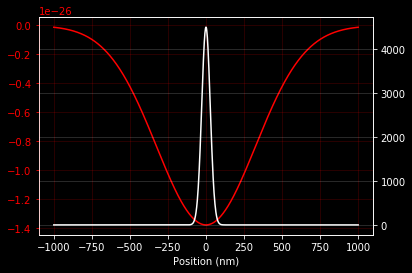

In [708]:
xpts = np.linspace(-1e-6,1e-6,1000)
fig, ax = plt.subplots()
nu = 150e3
V = 1e-3*mc.k_B
potential = potentialDipW0(xpts, V, 0, 650e-9)
ax.plot(xpts*1e9, potential, color='r')
ax.spines['left'].set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')
ax.grid(color='r',alpha=0.2)
ax.set_xlabel('Position (nm)')
psi = psiBump(xpts,0,nu)
ax2 = ax.twinx()
ax2.plot(xpts*1e9, psi, color='w')
ax2.grid(alpha=0.2)

In [27]:
def minFunction(nu):
    psi = psiBump(xpts,0,nu)
    return calculateEnergy(xpts, psi, potential)*1e40

In [710]:
depths = mc.k_B * np.linspace(1e-6,1e-3,100)
variationalFreq=[]
calculatedFreq=[]
trapWaist=650e-9
for depth in depths:
    potential = potentialDipW0(xpts, depth, 0, trapWaist)
    nu = np.sqrt(4*depth/(mc.Rb87_M*((2*np.pi)*trapWaist)**2))
    res = opt.minimize(minFunction, nu, method='Nelder-Mead', tol=1e-60 )
    calculatedFreq.append(nu)
    variationalFreq.append(res.x[0])

In [711]:
print(depths[-1]/mc.k_B,calculatedFreq[-1],variationalFreq[-1])

0.001 151468.0425732913 151751.1957801663


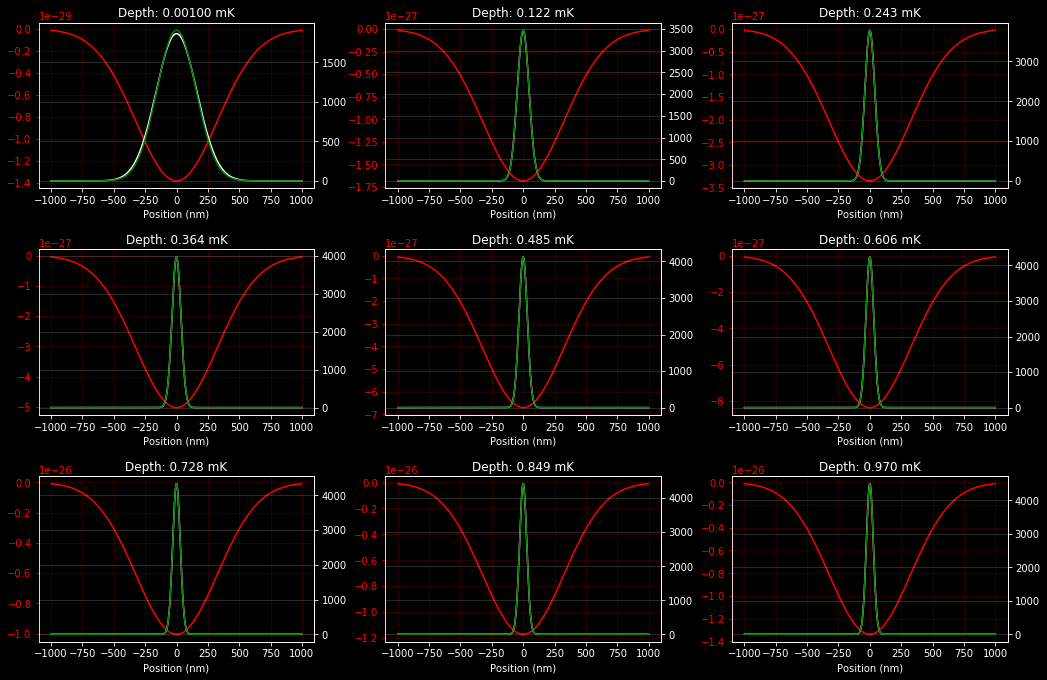

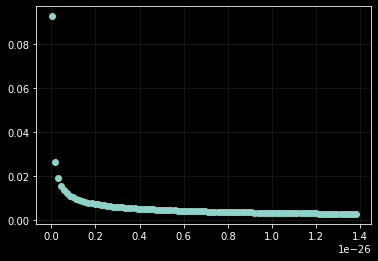

In [712]:
indexes = np.arange(0,100,12)
fig, axs = plt.subplots(3,3, figsize=(15,10)) 
fig.tight_layout(pad=4)

for index, ax in zip(indexes, axs.flatten()):
    xpts = np.linspace(-1e-6,1e-6,1000)
    potential = potentialDipW0(xpts, depths[index], 0, 650e-9)
    ax.set_title("Depth: " + misc.round_sig_str(depths[index]/mc.k_B * 1e3) + " mK")
    ax.plot(xpts*1e9, potential, color='r')
    ax.spines['left'].set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')
    ax.grid(color='r',alpha=0.2)
    ax.set_xlabel('Position (nm)')
    psi = psiBump(xpts,0,variationalFreq[index])
    psiC = psiBump(xpts,0,calculatedFreq[index])
    ax2 = ax.twinx()
    ax2.plot(xpts*1e9, psi, color='w')
    ax2.plot(xpts*1e9, psiC, color='g')
    ax2.grid(alpha=0.2)

f2, ax = plt.subplots()
ax.plot(depths, (np.array(calculatedWaists)-np.array(variationalWaist))/np.array(variationalWaist),'o');
ax.grid(alpha=0.1)

### double-well

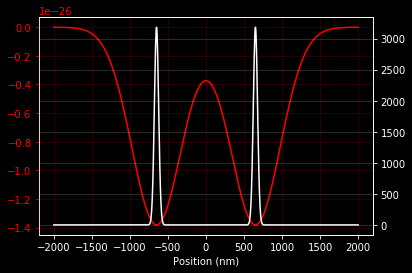

In [713]:
xpts = np.linspace(-2e-6, 2e-6, 1000)
fig, ax = plt.subplots()
nu = 150e3
V = 1e-3*mc.k_B
W0 = 650e-9
Delta = 2*W0
potential = potentialDipW0(xpts, V, -Delta/2, W0) + potentialDipW0(xpts, V, Delta/2, W0)
ax.plot(xpts*1e9, potential, color='r')
ax.spines['left'].set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')
ax.grid(color='r',alpha=0.2)
ax.set_xlabel('Position (nm)')
psi = 1/np.sqrt(2) * (psiBump(xpts,-Delta/2,nu) + psiBump(xpts,Delta/2,nu))
ax2 = ax.twinx()
ax2.plot(xpts*1e9, psi+min(potential), color='w')
ax2.grid(alpha=0.2)

In [28]:
def minDelta(Delta):
    nu = 150e3
    psi = 1/np.sqrt(2) * (psiBump(xpts,-Delta/2,nu) + psiBump(xpts,Delta/2,nu))
    Nsq = integ.simps(psi*psi,xpts)
    psi *= 1/np.sqrt(Nsq)
    return calculateEnergy(xpts, psi, potential)*1e40

In [29]:
import Miscellaneous as misc

In [419]:
Delta=0
psi = 1/np.sqrt(2) * (psiBump(xpts,-Delta/2,nu) + psiBump(xpts,Delta/2,nu))
Nsq = integ.simps(psi*psi,xpts)
psi *= 1/np.sqrt(Nsq)
integ.simps(psi*psi,xpts)

1.0

In [ ]:
variationalDeltas=[]
calculatedDeltas=[]
trapWaist=650e-9
Deltas = np.linspace(1.5*trapWaist,1*trapWaist,100)
for Delta in Deltas:
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    res = opt.minimize(minDelta, Delta, method='Nelder-Mead', tol=1e-60 )
    calculatedDeltas.append(Delta)
    variationalDeltas.append(res.x[0])

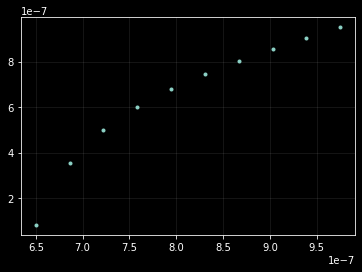

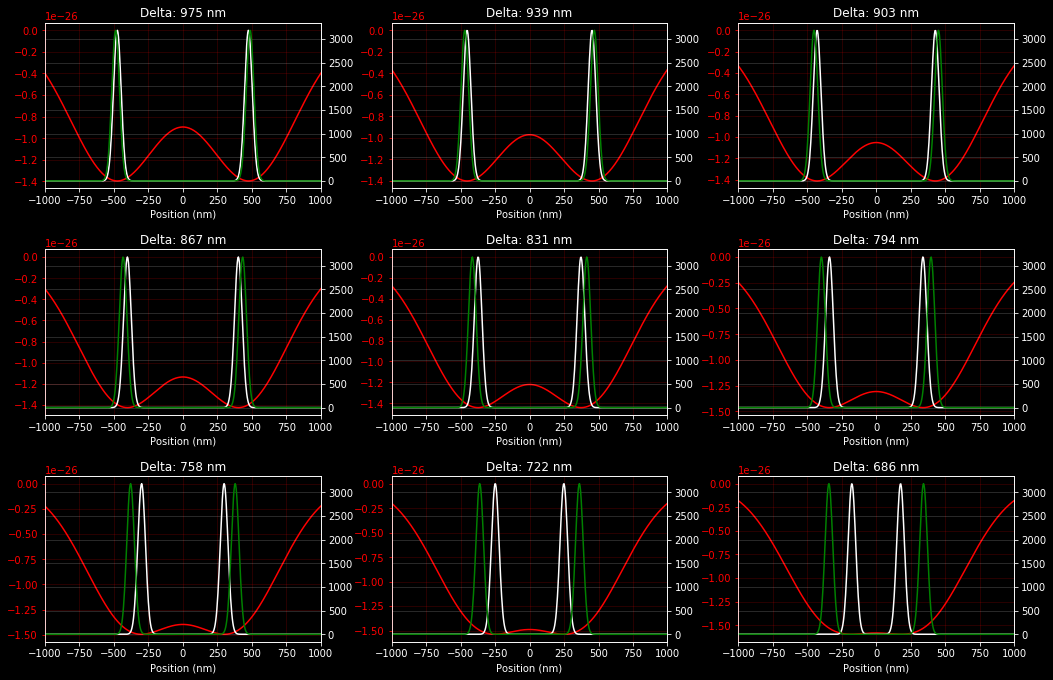

In [425]:
f2, ax = plt.subplots()
#ax.plot(depths, (np.array(calculatedWaists)-np.array(variationalWaist))/np.array(variationalWaist),'o');
ax.plot(calculatedDeltas,variationalDeltas,'.')
ax.grid(alpha=0.1)

#indexes = np.arange(0,100,12)
indexes = np.arange(0,10)
fig, axs = plt.subplots(3,3, figsize=(15,10)) 
fig.tight_layout(pad=4)

for index, ax in zip(indexes, axs.flatten()):
    xpts = np.linspace(-2e-6,2e-6,1000)
    Delta = Deltas[index]
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    #potential = potentialDipW0(xpts, depths[index], 0, 650e-9)
    ax.set_title("Delta: " + misc.round_sig_str(Deltas[index]*1e9) + " nm")
    ax.plot(xpts*1e9, potential, color='r')
    ax.spines['left'].set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')
    ax.grid(color='r',alpha=0.2)
    ax.set_xlabel('Position (nm)')
    zoomF=0.5
    ax.set_xlim(1e9*min(xpts)*zoomF, 1e9*max(xpts)*zoomF)
    psi = 1/np.sqrt(2) * (psiBump(xpts,-variationalDeltas[index]/2,nu) + psiBump(xpts,variationalDeltas[index]/2,nu))
    psiC = 1/np.sqrt(2) * (psiBump(xpts,-calculatedDeltas[index]/2,nu) + psiBump(xpts,calculatedDeltas[index]/2,nu))
    # psiC = psiBump(xpts,0,calculatedFreq[index])
    ax2 = ax.twinx()
    ax2.set_xlim(1e9*min(xpts)*zoomF, 1e9*max(xpts)*zoomF)
    ax2.plot(xpts*1e9, psi, color='w')
    ax2.plot(xpts*1e9, psiC, color='g')
    ax2.grid(alpha=0.2)


In [30]:
def minBetter(args):
    (Delta, nu) = args
    psi = 1/np.sqrt(2) * (psiBump(xpts,-Delta/2,nu) + psiBump(xpts,Delta/2,nu))
    Nsq = integ.simps(psi*psi,xpts)
    psi *= 1/np.sqrt(Nsq)
    return calculateEnergy(xpts, psi, potential)*1e40

In [547]:
import matplotlib.animation as animation
from IPython.display import HTML

### Full depth

In [714]:
variationalDeltas=[]
variationalFreqs=[]
calculatedDeltas=[]
calculatedFreqs=[]
trapWaist=650e-9
Deltas = np.linspace(2*trapWaist,0.9*trapWaist,200)
for Delta in Deltas:
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    res = opt.minimize(minBetter, [Delta,150e3], method='Nelder-Mead', tol=1e-60 )
    calculatedDeltas.append(Delta)
    calculatedFreqs.append(150e3)
    variationalDeltas.append(res.x[0])
    variationalFreqs.append(res.x[1])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


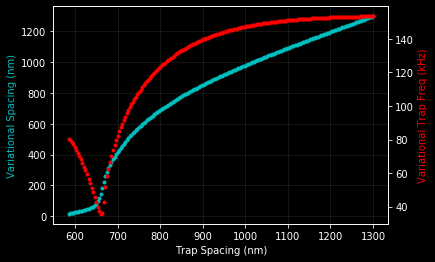

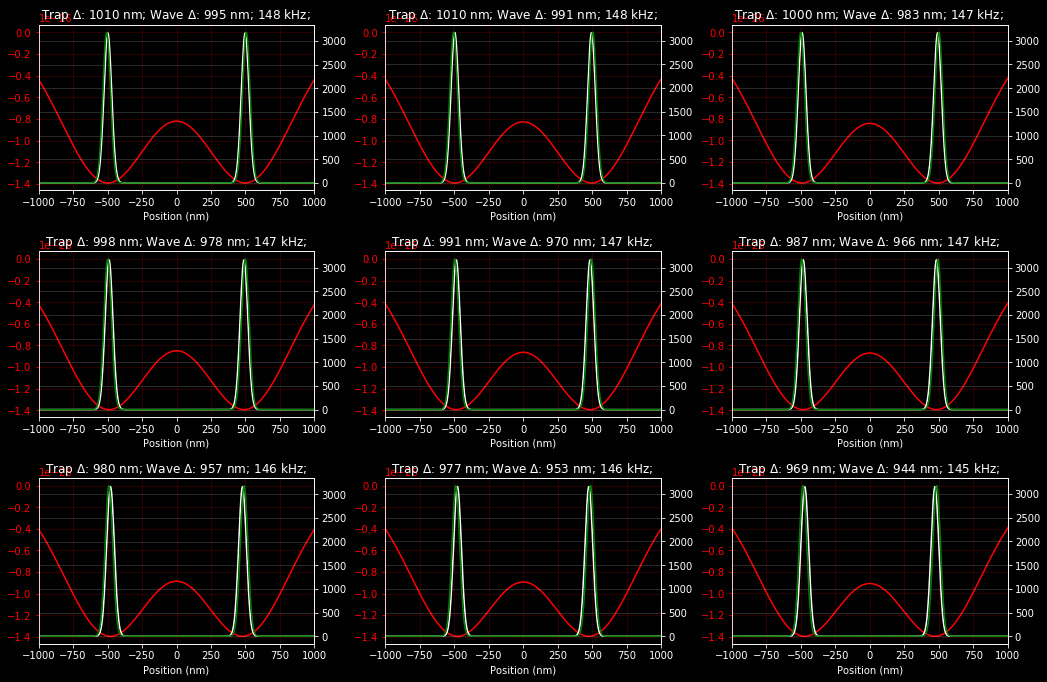

In [715]:
f2, ax = plt.subplots()
#ax.plot(depths, (np.array(calculatedWaists)-np.array(variationalWaist))/np.array(variationalWaist),'o');
ax.plot(Deltas*1e9,np.array(variationalDeltas)*1e9,'.c')
ax.set_xlabel('Trap Spacing (nm)')
ax.set_ylabel('Variational Spacing (nm)',color='c')
ax2 = ax.twinx()
ax2.plot(Deltas*1e9, np.array(variationalFreqs)*1e-3,'.r')
ax2.set_ylabel('Variational Trap Freq (kHz)',color='r')
ax.grid(alpha=0.1)

indexes = [int(x) for x in np.linspace(80,92,9)]
#indexes = np.arange(0,10)
fig, axs = plt.subplots(3,3, figsize=(15,10)) 
fig.tight_layout(pad=4)

for index, ax in zip(indexes, axs.flatten()):
    ax2 = ax.twinx()
    xpts = np.linspace(-2e-6,2e-6,1000)
    Delta = Deltas[index]
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    #potential = potentialDipW0(xpts, depths[index], 0, 650e-9)
    ax.set_title("Trap $\Delta$: " + misc.round_sig_str(Deltas[index]*1e9) + " nm; Wave $\Delta$: " + misc.round_sig_str(variationalDeltas[index]*1e9) + " nm; " 
                 + misc.round_sig_str(variationalFreqs[index]*1e-3) + " kHz; ")
    ax.spines['left'].set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')
    ax.grid(color='r',alpha=0.2)
    ax.set_xlabel('Position (nm)')
    ax.plot(xpts*1e9, potential, color='r')
    zoomF=0.5
    ax.set_xlim(1e9*min(xpts)*zoomF, 1e9*max(xpts)*zoomF)
    psi = 1/np.sqrt(2) * (psiBump(xpts,-variationalDeltas[index]/2,variationalFreqs[index]) + psiBump(xpts,variationalDeltas[index]/2,variationalFreqs[index]))
    psiC = 1/np.sqrt(2) * (psiBump(xpts,-calculatedDeltas[index]/2,calculatedFreqs[index]) + psiBump(xpts,calculatedDeltas[index]/2,calculatedFreqs[index]))
    
    ax2.set_xlim(1e9*min(xpts)*zoomF, 1e9*max(xpts)*zoomF)
    ax2.plot(xpts*1e9, psi, color='w')
    ax2.plot(xpts*1e9, psiC, color='g')
    ax2.grid(alpha=0.2)
    

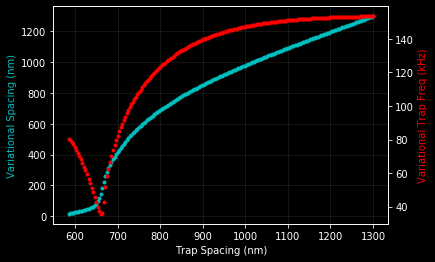

In [717]:
f2, ax = plt.subplots()
#ax.plot(depths, (np.array(calculatedWaists)-np.array(variationalWaist))/np.array(variationalWaist),'o');
ax.plot(Deltas*1e9,np.array(variationalDeltas)*1e9,'.c')
ax.set_xlabel('Trap Spacing (nm)')
ax.set_ylabel('Variational Spacing (nm)',color='c')
ax2 = ax.twinx()
ax2.plot(Deltas*1e9, np.array(variationalFreqs)*1e-3,'.r')
ax2.set_ylabel('Variational Trap Freq (kHz)',color='r')
ax.grid(alpha=0.1)

In [718]:
animateSeries(Deltas, interval=50)

### tunneling depth

or closer

In [ ]:
variationalDeltas=[]
variationalFreqs=[]
calculatedDeltas=[]
calculatedFreqs=[]
V=10e-6*mc.k_B
spotSize = 650e-9
trapNu = np.sqrt(4*V/(mc.Rb87_M*spotSize**2))*1e-3/(2*np.pi)
Deltas = np.linspace(4*trapWaist,0.3*trapWaist,500)
for Delta in Deltas:
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    res = opt.minimize(minBetter, [Delta,150e3], method='Nelder-Mead', tol=1e-60 )
    calculatedDeltas.append(Delta)
    calculatedFreqs.append(trapNu*1e3)
    variationalDeltas.append(res.x[0])
    variationalFreqs.append(res.x[1])

In [755]:
np.save('Deltas',Deltas)
np.save('VDeltas', abs(np.array(variationalDeltas)))
np.save('VFreqs', np.array(variationalFreqs))

In [756]:
DeltaLoad = np.load('Deltas.npy')
VDeltaLoad = np.load('VDeltas.npy')
VFreqLoad = np.load('VFreqs.npy')
interpSpacing = interp1d(DeltaLoad, VDeltaLoad)
interpFreq = interp1d(DeltaLoad, VFreqLoad)

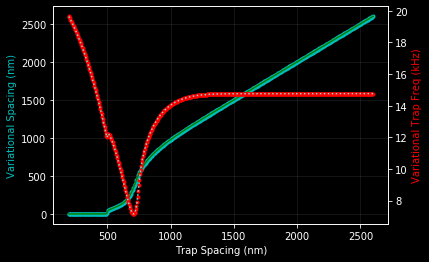

In [757]:
f2, ax = plt.subplots()
#ax.plot(depths, (np.array(calculatedWaists)-np.array(variationalWaist))/np.array(variationalWaist),'o');
ax.plot(Deltas*1e9,abs(np.array(variationalDeltas)*1e9),'.c')
ax.plot(Deltas*1e9,interpSpacing(Deltas)*1e9,'g')
ax.set_xlabel('Trap Spacing (nm)')
ax.set_ylabel('Variational Spacing (nm)',color='c')
ax2 = ax.twinx()
ax2.plot(Deltas*1e9, np.array(variationalFreqs)*1e-3,'.r')
ax2.plot(Deltas*1e9, interpFreq(Deltas)*1e-3,':')
ax2.set_ylabel('Variational Trap Freq (kHz)',color='r')
ax.grid(alpha=0.1)

In [31]:
def animateSeries(Deltas, variationalDeltas, variationalFreqs, trapWaist, interval=10, imshow_args=None):
    #if imshow_args == None:
        #imshow_args = {'cmap':dark_viridis_cmap}
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax2 = ax.twinx()
    xpts = np.linspace(-2e-6,2e-6,1000)
    Delta=Deltas[-1]
    potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
    ax.set_ylabel('Depth ()')
    ax.spines['left'].set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')
    vDelta = variationalDeltas[-1]
    vFreq = variationalFreqs[-1]        
    psi  = 1/np.sqrt(2) * ( psiBump(xpts,-vDelta/2,vFreq) + psiBump(xpts, vDelta/2,vFreq))
    psiC = 1/np.sqrt(2) * ( psiBump(xpts,-calculatedDeltas[-1]/2,calculatedFreqs[-1]) 
                            + psiBump(xpts,calculatedDeltas[-1]/2,calculatedFreqs[-1]) )
    line, = ax.plot(xpts*1e9, potential/(mc.k_B*1e-3),'r', label='Potential')
    line2, = ax2.plot(xpts*1e9, psi, color='w', label='Variational Wf')
    line3, = ax2.plot(xpts*1e9, psiC, color='g', linestyle=':', label='Naive Wf')
    ax.legend(loc='center left')#=(0.2,0.3))
    ax2.legend(loc='lower left')
    
    def init():  # only required for blitting to give a clean slate.
        line.set_ydata([np.nan] * len(xpts))
        return line,
    def animate(num):
        Delta = Deltas[num]
        vDelta = variationalDeltas[num]
        vFreq = variationalFreqs[num]
        if animate.tb is not None:
            animate.tb.set_visible(False)
        animate.tb = ax.text(0,-0.005,r'Trap $\Delta$: ' + misc.round_sig_str(Delta*1e9) 
                             + ' nm\n'+r'WF $\Delta$: ' + misc.round_sig_str(vDelta*1e9) 
                             + " nm\n"+r'WF $\nu$: ' + misc.round_sig_str(vFreq*1e-3) + ' kHz')

        psi = 1/np.sqrt(2) * ( psiBump(xpts,-vDelta/2,vFreq) + psiBump(xpts, vDelta/2,vFreq) )
        psiC = 1/np.sqrt(2) * ( psiBump(xpts,-calculatedDeltas[num]/2,calculatedFreqs[num]) 
                               + psiBump(xpts,calculatedDeltas[num]/2,calculatedFreqs[num]) )
        potential = potentialDipW0(xpts, V, -Delta/2, trapWaist) + potentialDipW0(xpts, V, Delta/2, trapWaist)
        line.set_ydata(potential/(mc.k_B*1e-3))
        line2.set_ydata(psi)
        line3.set_ydata(psiC)
        return line,
    
    animate.tb = None
    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(Deltas), interval=int(interval), blit=False, repeat=True)
    plt.close()
    return HTML(ani.to_html5_video())

In [780]:
interval = 1
animateSeries(Deltas[::interval], variationalDeltas[::interval], variationalFreqs[::interval], spotSize, interval=100)

## 2D Calculation

Trying to get the bumps out of the multidimensional stuff

In [32]:
def KE2D(psipts, xp, yp):
    sh = psipts.shape
    d1Termx = np.diff(psipts, axis=0)/np.diff(yp, axis=0)
    d1Termx = np.append(d1Termx, np.zeros((1, sh[1])), axis=0)
    d2Termx = np.diff(d1Termx, axis=0)/np.diff(yp, axis=0)
    d2Termx = np.append(d2Termx, np.zeros((1, sh[1])), axis=0)
    
    d1Termy = np.diff(psipts, axis=1)/np.diff(xp, axis=1)
    d1Termy = np.append(d1Termy, np.zeros((sh[0], 1)), axis=1)
    d2Termy = np.diff(d1Termy, axis=1)/np.diff(xp, axis=1)
    d2Termy = np.append(d2Termy, np.zeros((sh[0], 1)), axis=1)
    
    return -mc.hbar**2/(2*mc.Rb87_M) * (d2Termx + d2Termy)

In [33]:
def simps2d(base, xp, yp):
    mp = int(len(base)/2)
    intx = integ.simps(base, xp,axis=0)
    return integ.simps(intx, yp,axis=0)

In [34]:
def calc2dEnergy(psi,potential, xp, yp):
    U, kineticEnergy = calc2dEnergies(psi,potential, xp, yp)
    return U + kineticEnergy

In [35]:
def calc2dEnergies(psi,potential, xp, yp):
    x1 = xp[0,:]
    y1 = yp[:,0]
    U = simps2d(psi*potential*psi, y1, x1)    
    kineticEnergy = simps2d(psi*KE2D(psi, xp, yp), y1, x1)
    return U, kineticEnergy

In [1486]:
energies = []
yspace = 0.1e-6
xspace = 1.5e-6
numYpts = 400
numXpts = 400
nums = np.linspace(15,100,100)
spaces = np.linspace(0.03e-6,0.5e-6,100)
for yspace in spaces:
    x1 = np.linspace(-xspace,xspace,numXpts)
    y1 = np.linspace(-yspace,yspace,numYpts)
    Xp, Yp = np.meshgrid(x1, y1)
    psi = psiBump(Xp, 0, 150e3)*psiBump(Yp,0,150e3)
    psisq = psi*psi
    potential = potentialDipW0(Xp, 1e6, 0, trapWaist)*potentialDipW0(Yp, V, 0, trapWaist)
    energies.append(calc2dEnergy(psi,potential,Xp,Yp))

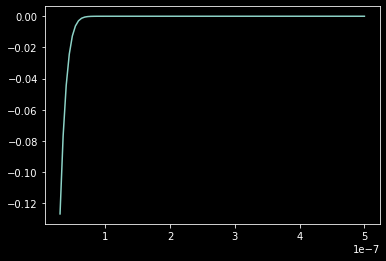

In [1487]:
plt.plot(spaces, (energies-energies[-1])/energies[-1])

In [36]:
def minFuncSimple2D(args):
    nux, nuy = args

In [37]:
def minFuncSimple2D(args):
    #print(args)
    (nu_x, nu_y) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0:
        #print('!!!!!!!!!!!!!!!')
        return 1e9
    psi = psiBump(Xp, 0, nu_x) * psiBump(Yp, 0, nu_y) 
    x1 = Xp[0,:]
    y1 = Yp[:,0]
    N = simps2d(psi*psi, y1, x1)    
    psi *= 1/np.sqrt(Nsq)
    return calc2dEnergy( psi, potential, Xp, Yp)

In [1526]:
yspace = 0.2e-6
xspace = 0.2e-6
numYpts = 200
numXpts = 200

x1 = np.linspace(-xspace,xspace,numXpts)
y1 = np.linspace(-yspace,yspace,numYpts)
Xp, Yp = np.meshgrid(x1, y1)

potential = -V * potentialDipW0(Xp, 1, 0, trapWaist)*potentialDipW0(Yp, 1, 0, trapWaist)

args = [150e3, 150e3]

(nu_x, nu_y) = args
if nu_x < 0 or nu_y < 0 or nu_z < 0:
    print('!!!!!!!!!!!!!!!')
psi = psiBump(Xp, 0, nu_x) * psiBump(Yp, 0, nu_y) 
x1 = Xp[0,:]
y1 = Yp[:,0]
N = simps2d(psi*psi, y1, x1)    
psi *= 1/np.sqrt(Nsq)
calc2dEnergies( psi, potential, Xp, Yp)

(-6.878000140661126e-29, 2.4734682970444994e-29)

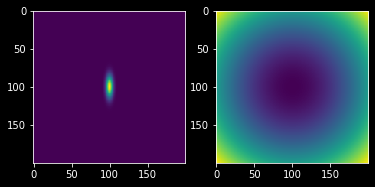

In [1525]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(psi**2)
ax[1].imshow(potential)

In [1474]:
minFuncSimple2D([130e3,150e3])

6.765861690555471e-29

In [1586]:
V=10e-6*mc.k_B
spotSize = 650e-9

trapNu = np.sqrt(4*V/(mc.Rb87_M*spotSize**2))*1e-3/(2*np.pi)
#Deltas = np.linspace(4*trapWaist,0.3*trapWaist,500)
#for Delta in Deltas:
Delta = 1e-6
V = 1e-3*mc.k_B
potential = - V * potentialDipW0(Xp, 1, 0, 650e-9)*potentialDipW0(Yp, 1, 0, 650e-9)
res = opt.minimize(minFuncSimple2D, [150e3, 150e3], method='Nelder-Mead', tol=1e-60 )
print(res)

 final_simplex: (array([[151618.4037642 , 151618.42546642],
       [151618.4037642 , 151618.42546642],
       [151618.4037642 , 151618.42546642]]), array([-6.8532683e-27, -6.8532683e-27, -6.8532683e-27]))
           fun: -6.853268300048025e-27
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 132
        status: 1
       success: False
             x: array([151618.4037642 , 151618.42546642])


In [1587]:
yspace = 0.2e-6
xspace = 0.2e-6
numYpts = 200
numXpts = 200

x1 = np.linspace(-xspace,xspace,numXpts)
y1 = np.linspace(-yspace,yspace,numYpts)
Xp, Yp = np.meshgrid(x1, y1)

potential = -V * potentialDipW0(Xp, 1, 0, trapWaist)*potentialDipW0(Yp, 1, 0, trapWaist)

args = [16259.4883199 , 16259.48908092]

(nu_x, nu_y) = args
if nu_x < 0 or nu_y < 0 or nu_z < 0:
    print('!!!!!!!!!!!!!!!')
psi = psiBump(Xp, 0, nu_x) * psiBump(Yp, 0, nu_y) 
x1 = Xp[0,:]
y1 = Yp[:,0]
N = simps2d(psi*psi, y1, x1)    
psi *= 1/np.sqrt(Nsq)
calc2dEnergies( psi, potential, Xp, Yp)

(-6.668180056371167e-27, 2.6849524130783386e-30)

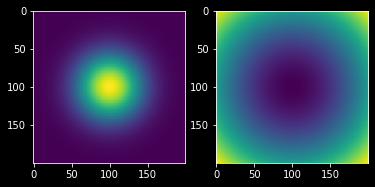

In [1584]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(psi**2)
ax[1].imshow(potential)

## 3D calculation

In [38]:
def KE3D(psipts, xp, yp, zp):
    sh = psipts.shape
    d1Termx = np.diff(psipts, axis=0)/np.diff(yp, axis=0)
    d1Termx = np.append(d1Termx, np.zeros((1, sh[1], sh[2])), axis=0)
    d2Termx = np.diff(d1Termx, axis=0)/np.diff(yp, axis=0)
    d2Termx = np.append(d2Termx, np.zeros((1, sh[1], sh[2])), axis=0)
    
    d1Termy = np.diff(psipts, axis=1)/np.diff(xp, axis=1)
    d1Termy = np.append(d1Termy, np.zeros((sh[0], 1, sh[2])), axis=1)
    d2Termy = np.diff(d1Termy, axis=1)/np.diff(xp, axis=1)
    d2Termy = np.append(d2Termy, np.zeros((sh[0], 1, sh[2])), axis=1)
    
    d1Termz = np.diff(psipts, axis=2)/np.diff(zp, axis=2)
    d1Termz = np.append(d1Termz, np.zeros((sh[0], sh[1], 1)), axis=2)
    d2Termz = np.diff(d1Termz, axis=2)/np.diff(zp, axis=2)
    d2Termz = np.append(d2Termz, np.zeros((sh[0], sh[1], 1)), axis=2)
    
    return -mc.hbar**2/(2*mc.Rb87_M) * (d2Termx + d2Termy + d2Termz)

In [39]:
def simps3d(base, xp, yp, zp):
    mp = int(len(base)/2)
    xint = integ.simps(base, xp,axis=0)
    xyint = integ.simps(xint, yp,axis=0)
    xyzint = integ.simps(xyint, zp,axis=0)
    return xyzint

In [40]:
def calc3dEnergy(psi,potential, xp, yp, zp):
    U, kineticEnergy = calc3dEnergies(psi,potential, xp, yp, zp)
    return U + kineticEnergy

In [41]:
def calc3dEnergies(psi,potential, xp, yp, zp):
    x1 = xp[0,:,0]
    y1 = yp[:,0,0]
    z1 = zp[0,0,:]
    U = simps3d(psi*potential*psi, y1, x1, z1)    
    kineticEnergy = simps3d(psi*KE3D(psi, xp, yp, zp),y1, x1,z1)
    return U, kineticEnergy

In [42]:
def potential3D(Xp, Yp, Zp, x0, V, w_xy, w_z):
    return potentialDipW0(Xp, V, x0, w_xy)*potentialDipW0(Yp, 1, 0, w_xy) * potentialDipW0(Zp, 1, 0, w_z)

def psi3D(Xp, Yp, Zp, xpos, nu_x, nu_y, nu_z):
    return psiBump(Xp, xpos, nu_x) * psiBump(Yp, 0, nu_y) * psiBump(Zp, 0, nu_z)

In [45]:
def minFuncSimple3D(args):
    print(args)
    (nu_x, nu_y, nu_z) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0:
        print('!!!!!!!!!!!!!!!')
        return 1e9
    psi = 1/np.sqrt(2) * psi3D(Xp, Yp, Zp, 0, nu_x, nu_y, nu_z)
    x1 = Xp[0,:,0]
    y1 = Yp[:,0,0]
    z1 = Zp[0,0,:]
    N = simps3d(psi*psi, y1, x1, z1)    
    psi *= 1/np.sqrt(Nsq)
    return calc3dEnergy( psi, potential, Xp, Yp, Zp )

In [46]:
def minFunc3D(args):
    print(args)
    (Delta, nu_x, nu_y, nu_z) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0:
        return 1e9
    psi = 1/np.sqrt(2) * (psi3D(Xp, Yp, Zp, -Delta/2, nu_x, nu_y, nu_z)+psi3D(Xp, Yp, Zp, +Delta/2, nu_x, nu_y, nu_z))
    x1 = Xp[0,:,0]
    y1 = Yp[:,0,0]
    z1 = Zp[0,0,:]
    N = simps3d(psi*psi, y1, x1, z1)    
    psi *= 1/np.sqrt(Nsq)
    return calc3dEnergy( psi, potential, Xp, Yp, Zp )

In [ ]:
uenergies = []
kenergies = []
tenergies = []
yspace = 0.1e-6
xspace = 1.5e-6
numYpts = 20
numXpts = 200
numZpts = 200
zspace = 3e-6
#spaces = np.linspace(0.1e-6,0.5e-6,20)
numZpts_vals = np.linspace(50,200)
for numZpts in numZpts_vals:
    x1 = np.linspace(-xspace,xspace,numXpts)
    y1 = np.linspace(-yspace,yspace,numYpts)
    z1 = np.linspace(-zspace,zspace,int(numZpts))
    Xp, Yp, Zp = np.meshgrid(x1, y1, z1)
    psi = psiBump(Xp, 0, 150e3)*psiBump(Yp,0,150e3)*psiBump(Zp,0,35e3)
    potential = potentialDipW0(Xp, 1e6, 0, trapWaist)*potentialDipW0(Yp, V, 0, trapWaist)*potentialDipW0(Zp, V, 0, trapWaist)
    u, K = calc3dEnergies(psi,potential,Xp,Yp,Zp)
    uenergies.append(u)
    kenergies.append(K)
    tenergies.append(u+K)

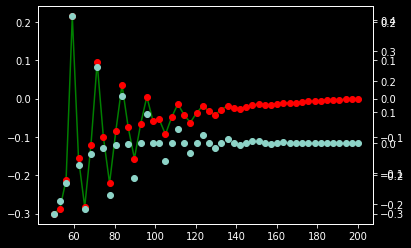

In [1279]:
fig, ax = plt.subplots()
ax.plot(numZpts_vals, (tenergies-tenergies[-1])/tenergies[-1],'g')
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.plot(numZpts_vals, (uenergies-uenergies[-1])/uenergies[-1],'o')
ax2.plot(numZpts_vals, (kenergies-kenergies[-1])/kenergies[-1],'or')

In [1300]:
minargs = [Delta, 150e3, 150e3, 35e3]

In [1530]:
V = 1e-3*mc.k_B

In [1531]:
yspace = 0.3e-6
xspace = 1.5e-6
numYpts = 60
numXpts = 200
numZpts = 200
zspace = 3e-6
#spaces = np.linspace(0.1e-6,0.5e-6,20)
numZpts_vals = np.linspace(50,200)
x1 = np.linspace(-xspace,xspace,numXpts)
y1 = np.linspace(-yspace,yspace,numYpts)
z1 = np.linspace(-zspace,zspace,int(numZpts))
Xp, Yp, Zp = np.meshgrid(x1, y1, z1)

In [1414]:
Delta=2e-6

In [1597]:
yspace = 0.5e-6
xspace = 0.5e-6
numYpts = 100
numXpts = 100
numZpts = 100
zspace = 0.5e-6
#spaces = np.linspace(0.1e-6,0.5e-6,20)
numZpts_vals = np.linspace(50,200)
x1 = np.linspace(-xspace,xspace,numXpts)
y1 = np.linspace(-yspace,yspace,numYpts)
z1 = np.linspace(-zspace,zspace,int(numZpts))
Xp, Yp, Zp = np.meshgrid(x1, y1, z1)
args = [Delta, 150e3, 150e3, 150e3]
(Delta, nu_x, nu_y, nu_z) = args
if nu_x < 0 or nu_y < 0 or nu_z < 0:
    print('!!!!!!!!!!!!!!!')
psi = psi3D(Xp, Yp, Zp, 0, nu_x, nu_y, nu_z)
V = 1e-3*mc.k_B
potential = potential3D(Xp, Yp, Zp, V, 650e-9, 1e-6)
x1 = Xp[0,:,0]
y1 = Yp[:,0,0]
z1 = Zp[0,0,:]
N = simps3d( psi*psi, y1, x1, z1 )
print(N)
psi *= 1/np.sqrt(Nsq)
print(calc3dEnergies( psi, potential, Xp, Yp, Zp ))

0.9999999999999994
(-6.872673569404418e-27, 3.318156079262726e-29)


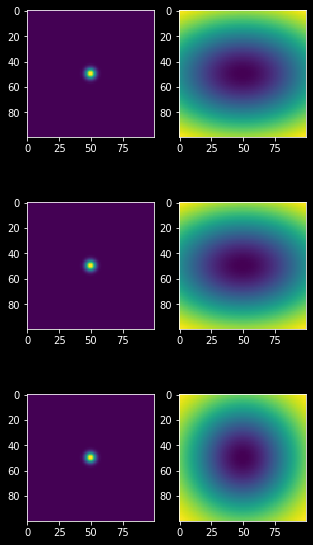

In [1598]:
mp = int(len(psi)/2)
fig, ax = plt.subplots(3,2, figsize=(5,10))
ax[0,0].imshow(psi[mp,:,:])
ax[0,1].imshow(potential[mp,:,:])
ax[1,0].imshow(psi[:,mp,:])
ax[1,1].imshow(potential[:,mp,:])
ax[2,0].imshow(psi[:,:,mp])
ax[2,1].imshow(potential[:,:,mp])

In [1526]:
yspace = 0.2e-6
xspace = 0.2e-6
numYpts = 200
numXpts = 200

x1 = np.linspace(-xspace,xspace,numXpts)
y1 = np.linspace(-yspace,yspace,numYpts)
Xp, Yp = np.meshgrid(x1, y1)

potential = -V * potentialDipW0(Xp, 1, 0, trapWaist)*potentialDipW0(Yp, 1, 0, trapWaist)

args = [150e3, 150e3]

(nu_x, nu_y) = args
if nu_x < 0 or nu_y < 0 or nu_z < 0:
    print('!!!!!!!!!!!!!!!')
psi = psiBump(Xp, 0, nu_x) * psiBump(Yp, 0, nu_y) 
x1 = Xp[0,:]
y1 = Yp[:,0]
N = simps2d(psi*psi, y1, x1)    
psi *= 1/np.sqrt(Nsq)
calc2dEnergies( psi, potential, Xp, Yp)

(-6.878000140661126e-29, 2.4734682970444994e-29)

In [47]:
def minFuncSimple3D(args):
    print('.',end='')
    (nu_x, nu_y, nu_z) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0:
        return 1e9
    psi = psi3D(Xp, Yp, Zp, 0, nu_x, nu_y, nu_z)
    x1 = Xp[0,:,0]
    y1 = Yp[:,0,0]
    z1 = Zp[0,0,:]
    N = simps3d(psi*psi, y1, x1, z1)
    psi *= 1/np.sqrt(Nsq)
    return calc3dEnergy( psi, potential, Xp, Yp, Zp )

In [153]:
def doubleWellMin(args):
    print('.',end='')
    (delta, nu_x, nu_y, nu_z) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0 or delta < 0:
        return 1e9
    psi = 1/np.sqrt(2)*(psi3D(Xp, Yp, Zp, -delta/2, nu_x, nu_y, nu_z) + psi3D(Xp, Yp, Zp, delta/2, nu_x, nu_y, nu_z))
    x1 = Xp[0,:,0]
    y1 = Yp[:,0,0]
    z1 = Zp[0,0,:]
    N = simps3d(psi*psi, y1, x1, z1)    
    psi *= 1/np.sqrt(N)
    return calc3dEnergy( psi, potential, Xp, Yp, Zp )

In [154]:
fixedYFreq=15e3
fixedZFreq=3.5e3
def doubleWellMinFixedYZ(args):
    print('.',end='')
    (delta, nu_x) = args
    if nu_x < 0 or nu_y < 0 or nu_z < 0 or delta < 0:
        return 1e9
    psi = 1/np.sqrt(2)*(psi3D(Xp, Yp, Zp, -delta/2, nu_x, fixedYFreq, fixedZFreq) + psi3D(Xp, Yp, Zp, delta/2, nu_x, fixedYFreq, fixedZFreq))
    x1 = Xp[0,:,0]
    y1 = Yp[:,0,0]
    z1 = Zp[0,0,:]
    N = simps3d(psi*psi, y1, x1, z1)    
    psi *= 1/np.sqrt(N)
    return calc3dEnergy( psi, potential, Xp, Yp, Zp )

$$
\omega_r = \sqrt{\frac{4V}{m_{Rb}w_0^2}}
$$

$$
\omega_z = \sqrt{\frac{2V}{mz_R^2}}
$$

$$
w_0_z^2 = z_R^2/2
$$

In [1649]:
w0 = 1.5e-6
V = 1e-3*mc.k_B
1/(2*np.pi) * np.sqrt(V/(mc.Rb87_M*w0**2))

32818.07589087978

In [1640]:
sig = np.sqrt(mc.hbar / (mc.Rb87_M*omega))

In [49]:
import datetime

In [51]:
import IPython
import time

In [52]:
def printProgress(num, total):
    IPython.display.clear_output(wait=True)
    print(misc.round_sig_str(num/total*100,4) + "%")

In [ ]:
for x in range(100):
    printProgress(x,100)
    time.sleep(1)

In [ ]:
print('Starting Calculations At: ', datetime.datetime.now())
variationalDeltas=[]
variationalFreqs=[]
calculatedDeltas=[]
calculatedFreqs=[]
results = []
V=10e-6*mc.k_B
spotSize = 650e-9

trapNu = np.sqrt(4*V/(mc.Rb87_M*spotSize**2))*1e-3/(2*np.pi)
#Deltas = np.linspace(4*trapWaist,0.3*trapWaist,500)
#for Delta in Deltas:
yspace = 0.3e-6
xspace = 1.5e-6
zspace = 0.5e-6
numYpts = 50
numXpts = 200
numZpts = 50
delta = 1.5e-6
#pts = np.linspace(20,200,5)
deltas = np.linspace(0.5e-6,1.5e-6, 20)
delta = 0.65e-6
for num, delta in enumerate([delta]):    
    x1 = np.linspace(-xspace,xspace,int(numXpts))
    y1 = np.linspace(-yspace,yspace,int(numYpts))
    z1 = np.linspace(-zspace,zspace,int(numZpts))
    Xp, Yp, Zp = np.meshgrid(x1, y1, z1)
    potential = potential3D(Xp, Yp, Zp, -delta/2, V, 650e-9, 1.5e-6) + potential3D(Xp, Yp, Zp, delta/2, V, 650e-9, 1.5e-6)
    res = opt.minimize(doubleWellMin, [delta, 15e3, 15e3, 3.5e3], method='Nelder-Mead', tol=1e-60 )
    results.append(res)
    printProgress(num+1, len(deltas))
    print(datetime.datetime.now())
    print('\n',delta)
    # plot
    #deltas = np.linspace(0.5e-6,1.5e-6, 5)
    fig, ax = plt.subplots()
    xf = [res.x[-3] for res in results]
    yf = [res.x[-2] for res in results]
    zf = [res.x[-1] for res in results]
    vDeltas = np.array([res.x[-4] for res in results])
    def ref(freqs):
        return freqs[-1]
    colors, _ = misc.getColors(4)
    pltDeltas = deltas[:len(xf)]
    ax.plot(pltDeltas*1e9, [(freq - ref(xf))/ref(xf) for freq in xf],'o', color=colors[0], label='nu_x')
    ax.plot(pltDeltas*1e9, [(freq - ref(yf))/ref(yf) for freq in yf],'o', color=colors[1], label='nu_y')
    ax.plot(pltDeltas*1e9, [(freq - ref(zf))/ref(zf) for freq in zf],'o', color=colors[2], label='nu_z')
    ax2 = ax.twinx()
    ax2.plot(pltDeltas*1e9, vDeltas*1e9,'or', label='delta')
    ax.set_xlabel('Delta (nm)')
    ax.set_ylabel('% different')
    ax2.set_ylabel('Variational Delta')
    ax.set_title(misc.round_sig_str(ref(xf))+', ' + misc.round_sig_str(ref(yf)) + ', ' + misc.round_sig_str(ref(zf)))
    ax.legend()
    ax2.legend()
    display(fig)

In [155]:
print('Starting Calculations At: ', datetime.datetime.now())
variationalDeltas=[]
variationalFreqs=[]
calculatedDeltas=[]
calculatedFreqs=[]
results = []
V=10e-6*mc.k_B
spotSize = 650e-9

trapNu = np.sqrt(4*V/(mc.Rb87_M*spotSize**2))*1e-3/(2*np.pi)
#Deltas = np.linspace(4*trapWaist,0.3*trapWaist,500)
#for Delta in Deltas:
yspace = 0.3e-6
xspace = 1.5e-6
zspace = 0.5e-6
numYpts = 20
numXpts = 200
numZpts = 20
delta = 1.5e-6
#pts = np.linspace(20,200,5)
deltas = np.linspace(0.5e-6,1.5e-6, 20)
delta = 0.65e-6
for num, delta in enumerate([delta]):    
    x1 = np.linspace(-xspace,xspace,int(numXpts))
    y1 = np.linspace(-yspace,yspace,int(numYpts))
    z1 = np.linspace(-zspace,zspace,int(numZpts))
    Xp, Yp, Zp = np.meshgrid(x1, y1, z1)
    potential = potential3D(Xp, Yp, Zp, -delta/2, V, 650e-9, 1.5e-6) + potential3D(Xp, Yp, Zp, delta/2, V, 650e-9, 1.5e-6)
    #res = opt.minimize(doubleWellMin, [delta, 15e3, 15e3, 3.5e3], method='Nelder-Mead', tol=1e-60 )
    res = opt.minimize(doubleWellMinFixedYZ, [delta,15e3], method='Nelder-Mead', tol=1e-60 )
    results.append(res)
    printProgress(num+1, len(deltas))
    print(datetime.datetime.now())
    print('\n',delta)

5.000%
2020-05-07 18:52:14.202729

 6.5e-07


In [156]:
wfdelta, nu_x = results[0].x
#display(wfdelta, wx, wy, wz)

In [157]:
delta = 0.65e-6

In [158]:
potential = potential3D( Xp, Yp, Zp, -delta/2, V, 650e-9, 1.5e-6) + potential3D(Xp, Yp, Zp, delta/2, V, 650e-9, 1.5e-6 )
psi = 1/np.sqrt(2) * (psi3D(Xp, Yp, Zp, -wfdelta/2, nu_x, nu_y, nu_z)+psi3D(Xp, Yp, Zp, +wfdelta/2, nu_x, nu_y, nu_z))

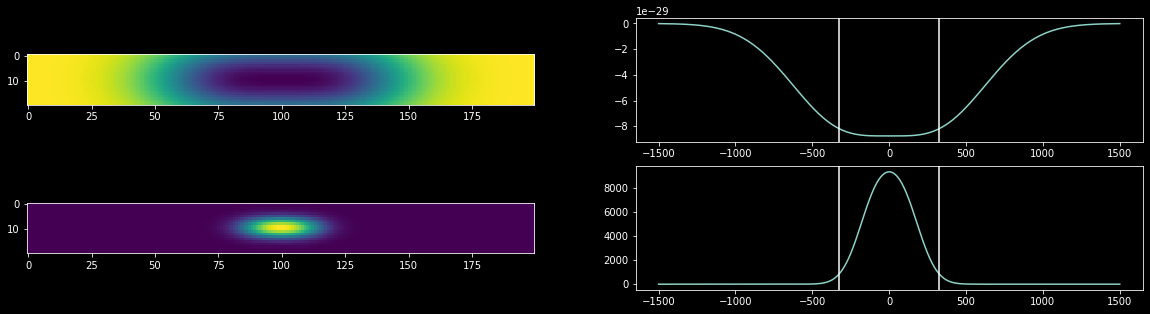

In [159]:
fig, ax = plt.subplots(2,2, figsize=(20,5))
ax[0,0].imshow(potential[:,:,0])
ax[0,1].plot(Xp[0,:,0]*1e9,potential[0,:,0])
ax[0,1].axvline(-delta/2*1e9)
ax[0,1].axvline(delta/2*1e9)
ax[1,0].imshow(psi[:,:,0])
ax[1,1].plot(Xp[0,:,0]*1e9,psi[0,:,0])
ax[1,1].axvline(-delta/2*1e9)
ax[1,1].axvline(delta/2*1e9)

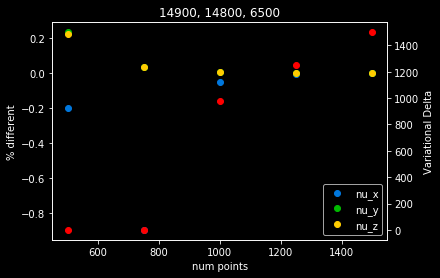

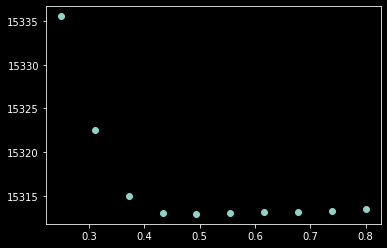

In [1658]:
plt.plot(spaces*1e6, [res.x[-2] for res in results],'o')

In [ ]:
res.x